# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [40]:
import time # to time the execution
import numpy as np
import math
import matplotlib.pyplot as plt

In [41]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt("spice_locations.txt", delimiter=",")
    return data

In [42]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers == None:
        x = np.random.randint(low=0, high=len(data)-1, size = K)
        return np.array(data[x])
    return init_centers

In [43]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(len(data))

In [44]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):

    dist = np.zeros((len(data), len(centers)))

    for i in range(len(data)):
        pairOfDist = np.zeros(len(centers))

        for j in range(len(centers)):
            pairOfDist[j] += math.dist(data[i], centers[j])

        dist[i] += pairOfDist
    return dist

In [45]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):

    x = len(distances)
    updated_labels = np.zeros(x)

    for i in range(x):
        updated_labels[i] = np.argmin(distances[i])

    return updated_labels

In [46]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
   
   centers = np.zeros((K, 2))

   for i in range(K):
      centers[i] += np.reshape(np.mean(data[np.argwhere(labels == i)], axis=0), 2)

   return centers

In [47]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return (len(labels1) == sum(labels1 == labels2))

In [48]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
         
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [75]:
### TODO 7
def visualise(data_path, labels, centers):
    

    # Scatter plot of the data points
    data = np.loadtxt(data_path, delimiter=",")
    plt.scatter(data[:, 0], data[:, 1], c="pink", label="Spice Points")

    plt.scatter(centers[:, 0], centers[:, 1], c = "red", label='Spice Centres')

    plt.legend()
    
    ### Set title as 'K-means clustering'
    plt.title("K-means clustering")

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    plt.savefig('K_means_clustering_plot')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0013949871063232422


<module 'matplotlib.pyplot' from 'c:\\Users\\ADITYA UJJWAL\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

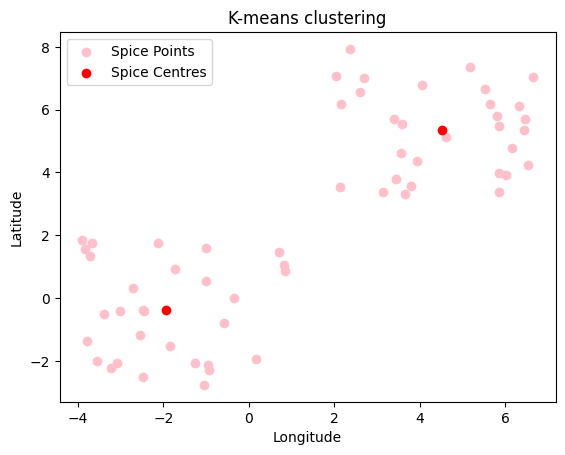

In [79]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)